In [1]:
# Importing required lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Received payment data

#### Step 1: Reading and Understanding the data

In [4]:
# Reading the dataset
rec_pay_data = pd.read_csv("C:\\Users\\SHRADDHA\\Downloads\\Received_Payments_Data (2).csv")
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [5]:
# Checking the shape of the data
rec_pay_data.shape

(93937, 16)

In [6]:
# Checking the info of the dataset
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [7]:
# Checking the distribution of data
rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [8]:
# checking number of unique values in each column
rec_pay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [9]:
# Null counts
round(rec_pay_data.isna().sum()/len(rec_pay_data.index), 4)

RECEIPT_METHOD           0.0000
CUSTOMER_NAME            0.0000
CUSTOMER_NUMBER          0.0000
RECEIPT_DOC_NO           0.0003
RECEIPT_DATE             0.0000
CLASS                    0.0000
CURRENCY_CODE            0.0000
Local Amount             0.0000
USD Amount               0.0000
INVOICE_ALLOCATED        0.0000
INVOICE_CREATION_DATE    0.0000
DUE_DATE                 0.0000
PAYMENT_TERM             0.0000
INVOICE_CLASS            0.0000
INVOICE_CURRENCY_CODE    0.0000
INVOICE_TYPE             0.0000
dtype: float64

#### The "RECEIPT_DOC_NO" col has 0.03% null values. Dropping the columns as it is not important for model building.

In [11]:
# Dropping the "RECEIPT_DOC_NO" column
rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the head of data again
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [12]:
# Changing the date related columns to pandas datatime object

rec_pay_data['RECEIPT_DATE'] = pd.to_datetime(rec_pay_data['RECEIPT_DATE'])
rec_pay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(rec_pay_data['INVOICE_CREATION_DATE'])
rec_pay_data['DUE_DATE'] = pd.to_datetime(rec_pay_data['DUE_DATE'])

In [13]:
rec_pay_data.info() # Sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

#### Creating the target column 'default' based on the late bill payment.

In [15]:
# Using boolean values and converting them into integer to create the target column 'default'
rec_pay_data['default'] = (rec_pay_data["RECEIPT_DATE"] > rec_pay_data["DUE_DATE"]).astype(int)


In [16]:
# Checking the count of defaulted bill payments
rec_pay_data.default.value_counts()

default
1    61978
0    31959
Name: count, dtype: int64

In [17]:

# Checking the percentage of defaulted bill payments
rec_pay_data.default.value_counts(normalize=True)

default
1    0.659783
0    0.340217
Name: proportion, dtype: float64

#### Step 2: Exploratory Data Analysis

In [19]:
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

#### Univariate Analysis

#### Numerical Columns

In [22]:
# 'Local Amount' column summary
rec_pay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [23]:
# Checking the number of bills with Local Amount equal to 0
rec_pay_data[rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

#### 1126 bills have amount equal to 0, hence dropping these rows.

In [25]:
# Dropping the rows with 'Local Amount' = 0
rec_pay_data = rec_pay_data[rec_pay_data['Local Amount'] > 0]

# Checking the shape again
rec_pay_data.shape

(92811, 16)

In [26]:
# Checking the summary of 'Local Amount' column again
rec_pay_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

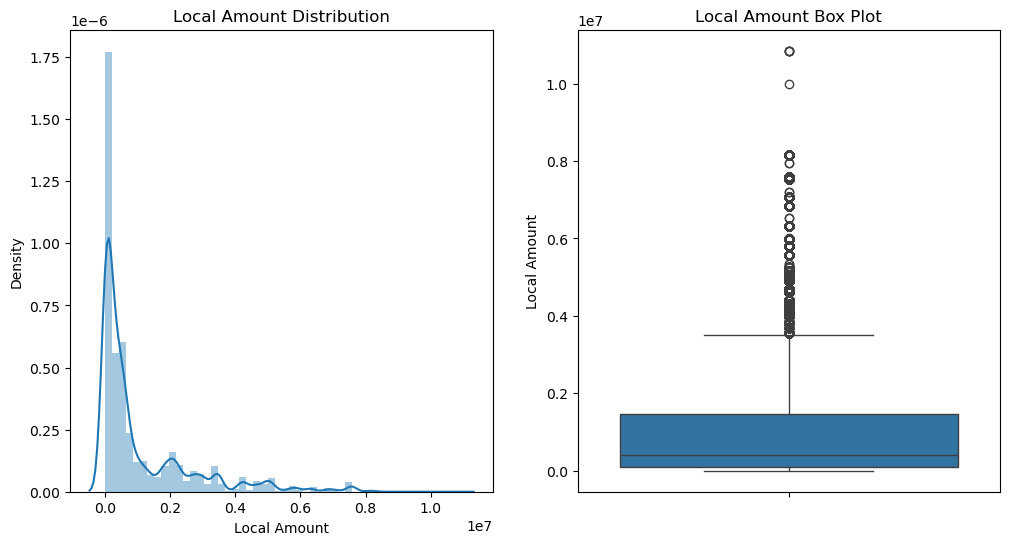

In [27]:
# Visualizing the distribution of 'Local Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

####  Dropping the 'Local Amount' column as it does not have a single currency value and we already have 'USD Amount' column for bill amount.

In [29]:
# Dropping the 'Local Amount' column
rec_pay_data.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [30]:
# 'USD Amount' column summary
rec_pay_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

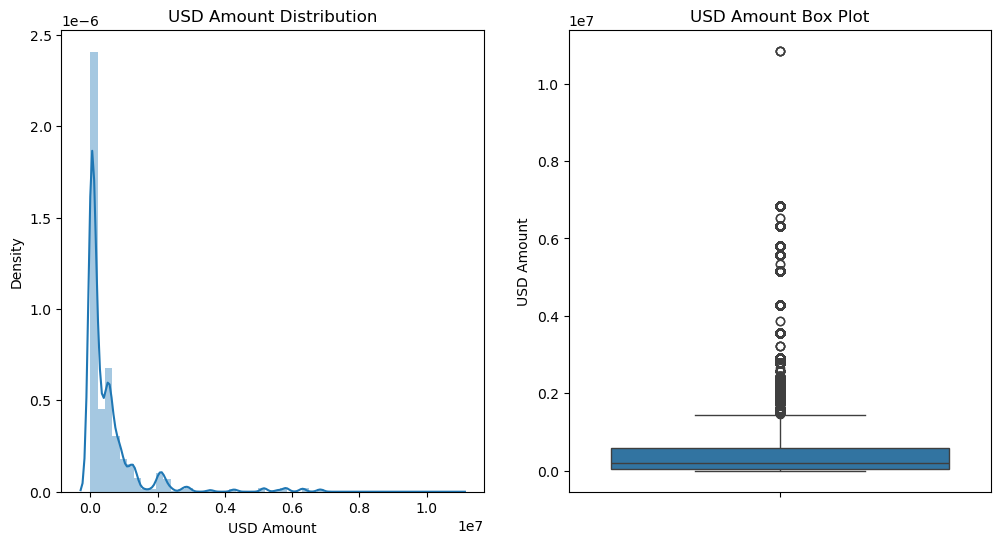

In [31]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()


### Categorical Columns

##### CUSTOMER_NAME column

In [34]:
# Finding the number of Unique customer names
rec_pay_data['CUSTOMER_NAME'].nunique()

689

In [35]:
# Top 10 customers on the basis total invoices
rec_pay_data['CUSTOMER_NAME'].value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: count, dtype: int64

##### CLASS column

In [37]:
# Top 10 customers based on the invoice amounts in USD.
rec_pay_data.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
HABC Corp    5.343216e+08
RADW Corp    3.622376e+08
L OR Corp    2.955509e+08
CGR  Corp    2.795162e+08
PCD  Corp    2.466070e+08
Name: USD Amount, dtype: float64

In [38]:
# Checking the number of unique values in the column
rec_pay_data['CLASS'].nunique()

1

In [39]:
# Dropping the CLASS column as it has only one value
rec_pay_data.drop('CLASS', axis=1, inplace=True)

#### CURRENCY_CODE column

In [41]:
# Checking the number of unique values in the column
rec_pay_data['CURRENCY_CODE'].nunique()

8

In [42]:
# Checking the value counts of each currency code
rec_pay_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

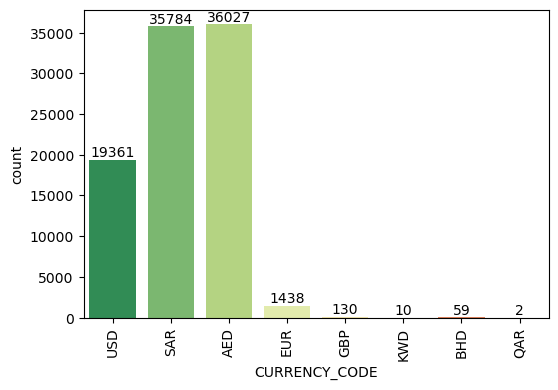

In [43]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rec_pay_data, x='CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

##### Currency used for bill payments are mostly USD, SAR or AED.

##### PAYMENT_TERM column

In [46]:
# Checking the number of unique values in the column
rec_pay_data['PAYMENT_TERM'].nunique()

42

In [47]:
# Checking the list of unique values
rec_pay_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [48]:
# Checking the top 10 PAYMENT_TERM
rec_pay_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

#### INVOICE_CLASS column

In [50]:
# Checking the value count of each level of INVOICE_CLASS
rec_pay_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

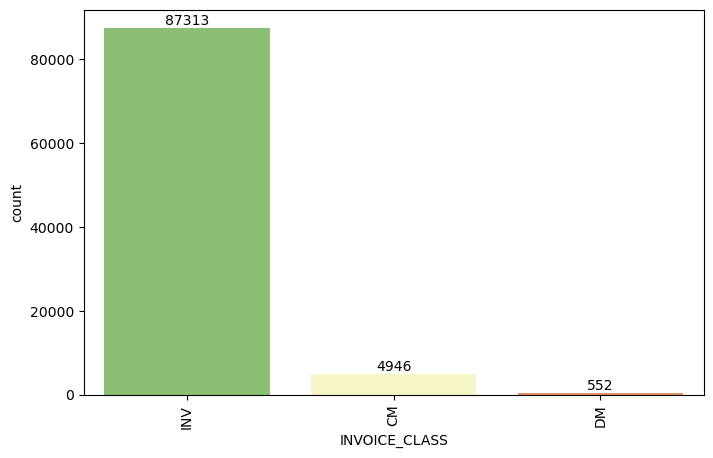

In [51]:
# Visualising the column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_CLASS', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


#### INV has the maximum number of bills in INVOICE_CLASS column.

#### INVOICE_CURRENCY_CODE column

In [54]:
# Checking the number of unique values in the column
rec_pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

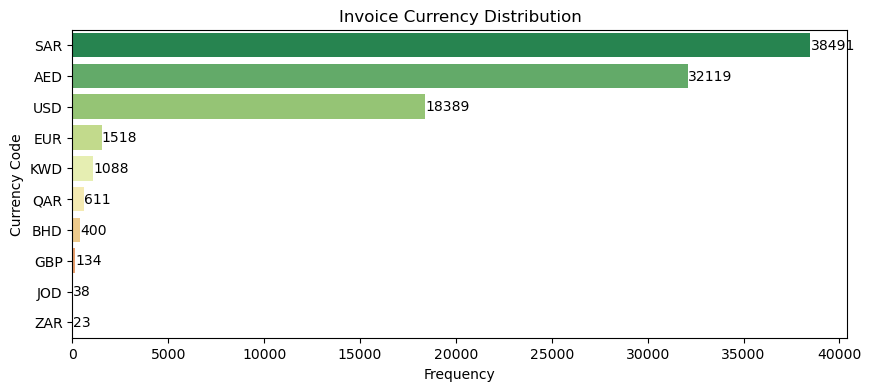

In [55]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='INVOICE_CURRENCY_CODE', order=rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Invoice Currency Distribution")
plt.ylabel("Currency Code")
plt.xlabel("Frequency")

plt.show()


#### The most number of invoices were generated in SAR, AED and USD currency.

#### INVOICE_TYPE column

In [58]:
# Checking the value count of each level of INVOICE_TYPE
rec_pay_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

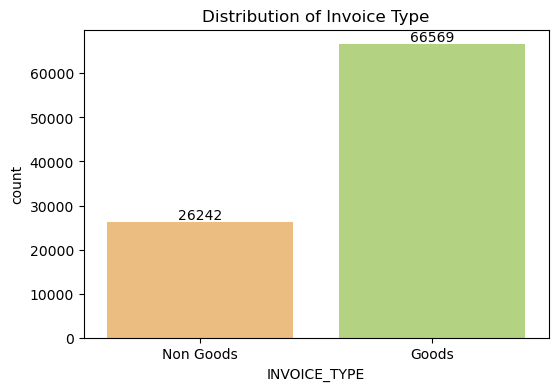

In [59]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_TYPE', palette='RdYlGn')

for label in ax.containers:
    ax.bar_label(label)

plt.title("Distribution of Invoice Type")
plt.show()


##### Almost 70% of the invoices generated were for Goods products.

##### RECEIPT_METHOD column

In [62]:
# Checking the value count of each level of RECEIPT_METHOD
rec_pay_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

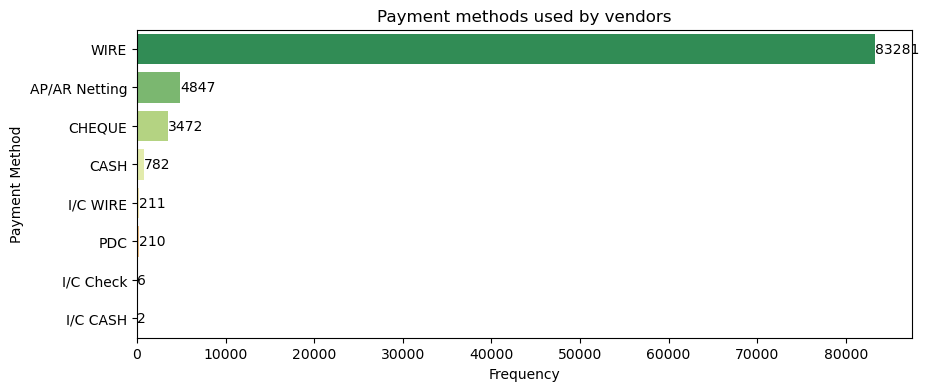

In [63]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='RECEIPT_METHOD', order=rec_pay_data['RECEIPT_METHOD'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

#### The most preferred payment method for bill payment is WIRE.

##### Data Imbalance

In [66]:
# Checking the distribution of target column 'default'
rec_pay_data["default"].value_counts(normalize= True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

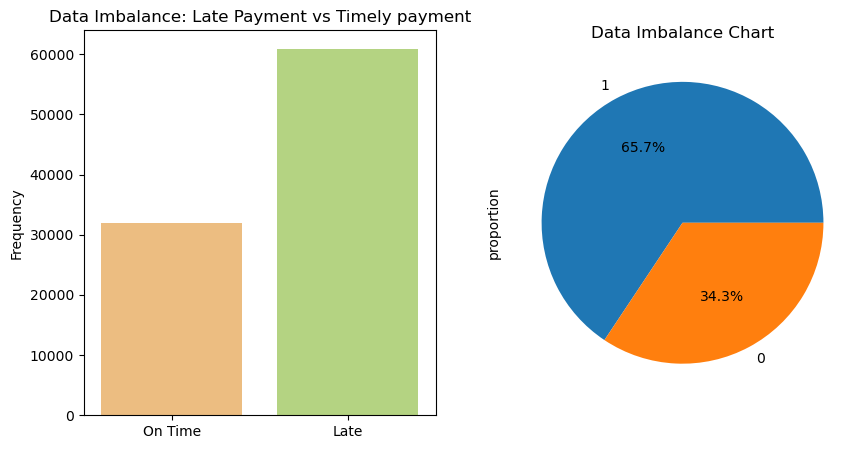

In [67]:
# ploting the default column
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='default', data=rec_pay_data, palette='RdYlGn')

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))

plt.subplot(1,2,2)
#data imbalance chart
(rec_pay_data.default.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.show()


##### There is a good distribution of data in the target variable.

##### Bi-variate Analysis

In [69]:
# Extracting month from the date columns

rec_pay_data['month_reciept'] = rec_pay_data['RECEIPT_DATE'].dt.month
rec_pay_data['month_inv_creation'] = rec_pay_data['INVOICE_CREATION_DATE'].dt.month
rec_pay_data['month_due'] = rec_pay_data['DUE_DATE'].dt.month

In [70]:
# Month-wise invoices due

orders_due_month = rec_pay_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [71]:
# Ensure 'default' column is numeric
rec_pay_data['default'] = pd.to_numeric(rec_pay_data['default'], errors='coerce')

# Now group by 'month_due' and calculate the mean of 'default'
late_dues = rec_pay_data.groupby('month_due')['default'].mean()

# Sorting by month_due
late_dues.sort_index(ascending=True)

month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: default, dtype: float64

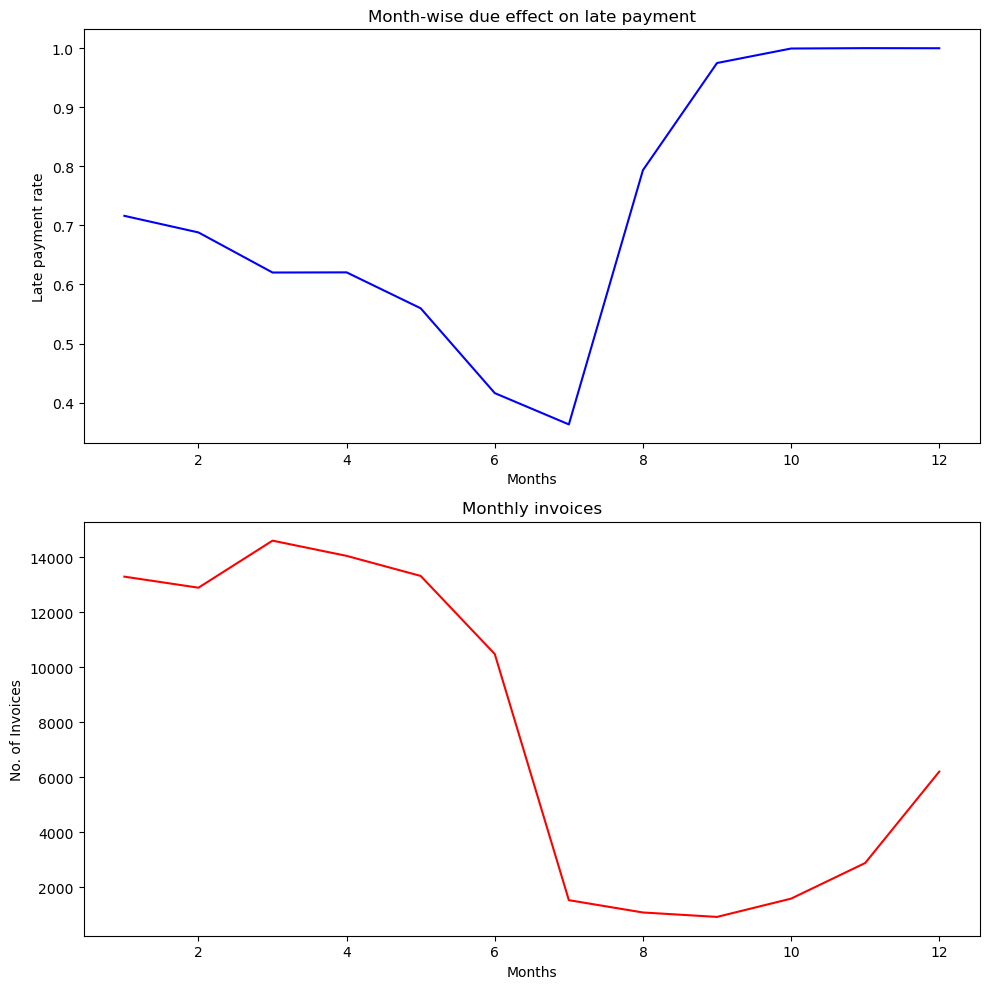

In [72]:
# Ensure 'default' column is numeric
rec_pay_data['default'] = pd.to_numeric(rec_pay_data['default'], errors='coerce')

# Compute late_dues: average default rate per month
late_dues = rec_pay_data.groupby('month_due')['default'].mean()

# Compute orders_due_month: number of invoices per month (or count of rows per month)
orders_due_month = rec_pay_data.groupby('month_due').size()

# Plotting
plt.figure(figsize=(10,10))

# Plot late payment rates by month
plt.subplot(2,1,1)
plt.plot(late_dues, color='blue')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

# Plot number of invoices by month
plt.subplot(2,1,2)
plt.plot(orders_due_month, color='red')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

# Show the plots
plt.tight_layout()
plt.show()

##### For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with large number of invoices.
##### Month 7 has the very low late payment rate, this can be because of the fact that the number of invoices is also low.
##### In the 2nd half of the year, the late payment increases steeply from 7th month onwards. The number of invoices are comparatively lower than the first half of the year.

In [74]:
# Receipt_date

#order_month_receipt = rec_pay_data.groupby('month_reciept').count()['DUE_DATE']  # number of payments received in a month

# out of all the payments received in month how many were late payments
#monthly_receipt = rec_pay_data.groupby('month_due').mean()['default']




# Convert 'default' column to numeric (1 for late, 0 for on-time)
rec_pay_data['default'] = rec_pay_data['default'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate the number of payments received in a month
order_month_receipt = rec_pay_data.groupby('month_reciept').count()['DUE_DATE']

# Calculate the mean of late payments per month (i.e., proportion of late payments)
monthly_receipt = rec_pay_data.groupby('month_due')['default'].mean()

# Now you can plot the values
print(order_month_receipt)
print(monthly_receipt)

month_reciept
1    16353
2    12557
3    16522
4    13829
5    16210
6    17340
Name: DUE_DATE, dtype: int64
month_due
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
Name: default, dtype: float64


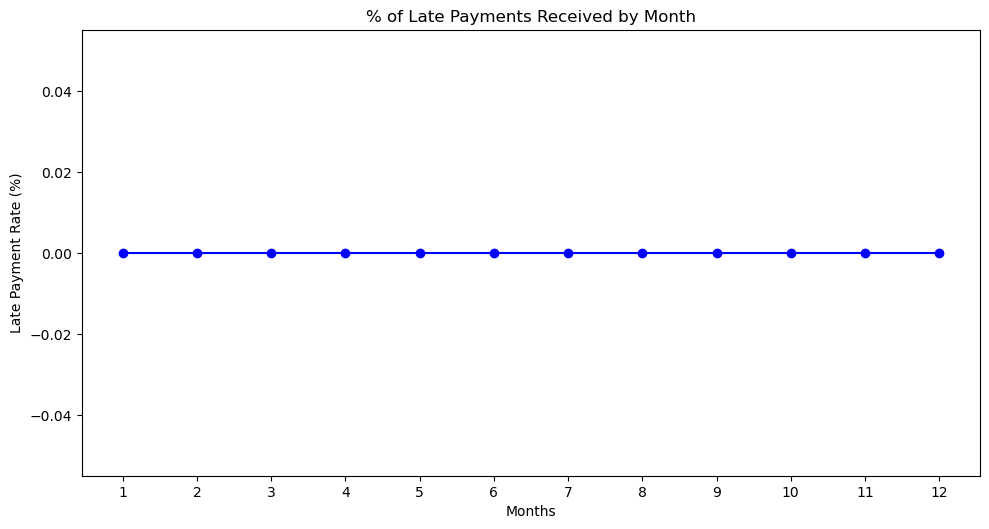

([<matplotlib.axis.XTick at 0x27b0f056990>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

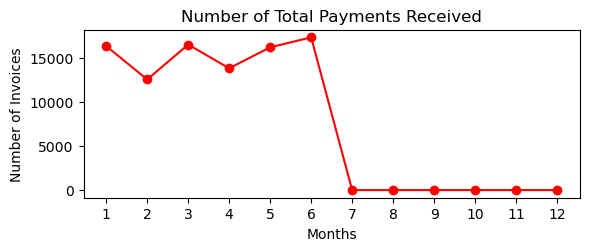

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'month_due' and 'month_reciept' are numeric
rec_pay_data['month_due'] = rec_pay_data['month_due'].astype(int)
rec_pay_data['month_reciept'] = rec_pay_data['month_reciept'].astype(int)

# Convert 'default' column to numeric (1 for late, 0 for on-time)
rec_pay_data['default'] = rec_pay_data['default'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate the number of payments received in each month (1-12)
order_month_receipt = rec_pay_data.groupby('month_reciept').count()['DUE_DATE']

# Calculate the mean of late payments per month (1-12)
monthly_receipt = rec_pay_data.groupby('month_due')['default'].mean()

# Reindex both series to ensure they cover all months (1 to 12)
months = np.arange(1, 13)
order_month_receipt = order_month_receipt.reindex(months, fill_value=0)
monthly_receipt = monthly_receipt.reindex(months, fill_value=0)

# Now you can plot the values
plt.figure(figsize=(10, 10))

# Plot late payment rate per month
plt.subplot(2, 1, 1)
plt.plot(monthly_receipt, color='blue',marker="o")

plt.title("% of Late Payments Received by Month")
plt.xlabel("Months")
plt.ylabel("Late Payment Rate (%)")
plt.xticks(months)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()
# Plot total payments received per month
plt.subplot(2, 1, 2)
plt.plot(order_month_receipt, color='red', marker='o')
plt.title("Number of Total Payments Received")
plt.xlabel("Months")
plt.ylabel("Number of Invoices")
plt.xticks(months)

#### No payment received against any invoices from 7th month onwards.

###### Late payment rate is decreases from 1st to 5th month.
###### For the months 7, 8 and 9, the late payment rate is very high.

### USD Amount column

In [79]:
usd_amt_late = rec_pay_data.pivot_table(values='USD Amount', index='default', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,537645.97205,191287.0,954807.277305


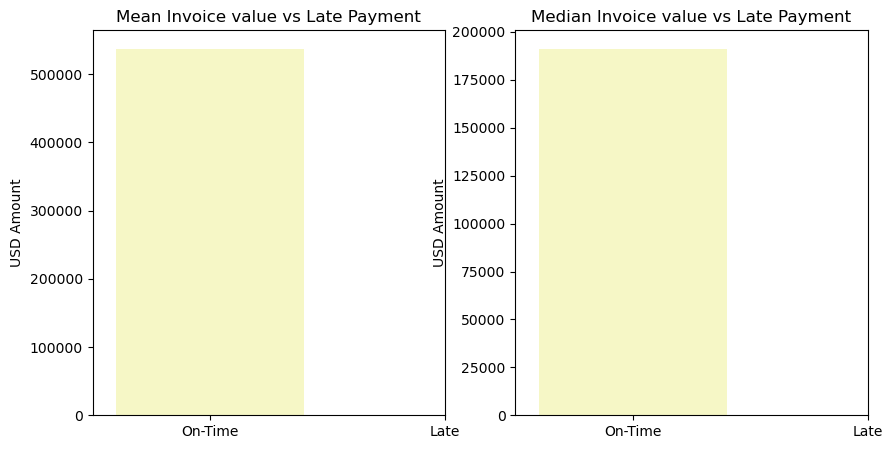

In [80]:
# Visualising the differencing between mean and median of the invoice value with respect to late payment

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='default', y=('mean','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='default', y=('median','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

##### The mean and median of invoice value of On-time bill payment is higher than late payment.

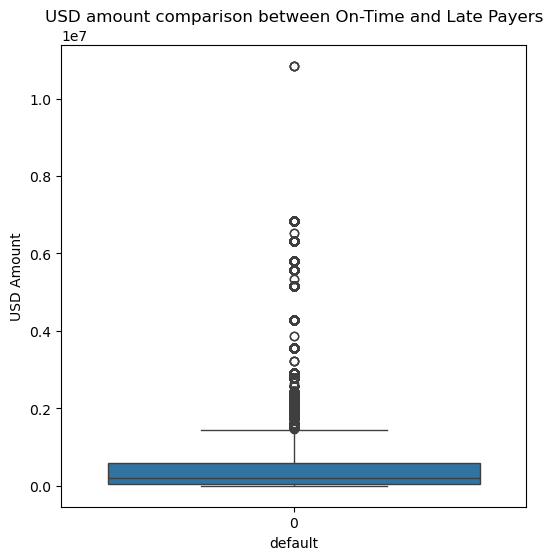

In [82]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='default', data = rec_pay_data)
plt.title("USD amount comparison between On-Time and Late Payers")

plt.show()

##### CUSTOMER_NAME column

In [84]:
# Convert 'default' column to numeric (if it's not already)
rec_pay_data['default'] = rec_pay_data['default'].apply(lambda x: 1 if x == 'yes' else 0)

# Get total orders per customer
customer_total_orders = rec_pay_data.groupby('CUSTOMER_NAME').count()['default'].sort_values(ascending=False).reset_index()

# Get the percentage of late payments per customer
customer_total_orders_late = rec_pay_data.groupby('CUSTOMER_NAME')['default'].mean().sort_values(ascending=False).reset_index()

print(customer_total_orders)
print(customer_total_orders_late)

    CUSTOMER_NAME  default
0       SEPH Corp    23075
1       FARO Corp    15004
2       PARF Corp     6624
3       ALLI Corp     5645
4       AREE Corp     2224
..            ...      ...
684     DEFI Corp        1
685     DESI Corp        1
686     OMRA Corp        1
687     NOUS Corp        1
688     KWAT Corp        1

[689 rows x 2 columns]
    CUSTOMER_NAME  default
0       3D D Corp      0.0
1       NOOR Corp      0.0
2       NEJR Corp      0.0
3       NEOL Corp      0.0
4       NEST Corp      0.0
..            ...      ...
684     EYEW Corp      0.0
685     F AN Corp      0.0
686     FACE Corp      0.0
687     FAKH Corp      0.0
688     ZV F Corp      0.0

[689 rows x 2 columns]


In [85]:
# Finding the important customers (customers with more than 500 orders)

imp_cust = customer_total_orders[customer_total_orders['default'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [86]:
# Checking only important customers late payment rate

imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,default
80,PARF Corp,0.0
81,PARI Corp,0.0
122,LIFE Corp,0.0
152,MCT Corp,0.0
172,RADW Corp,0.0
215,VAVA Corp,0.0
231,YOUG Corp,0.0
293,REAL Corp,0.0
336,SEPH Corp,0.0
391,CHRI Corp,0.0


##### INVOICE_CLASS column

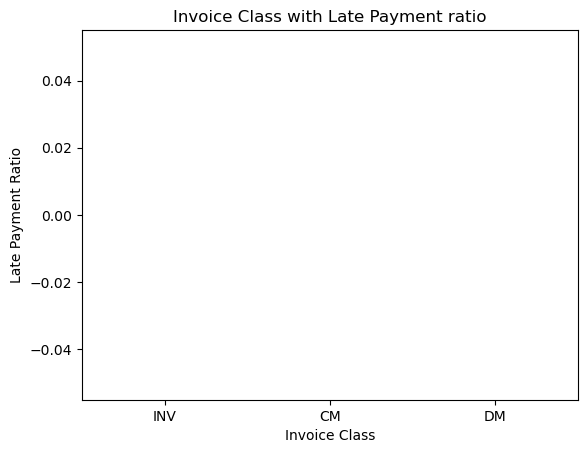

In [88]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=rec_pay_data, x='INVOICE_CLASS', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

##### Late payment ratio is very high for CM and lowest for INV INVOICE_CLASS.

### Late payment ratio is very high for CM and lowest for INV INVOICE_CLASS.

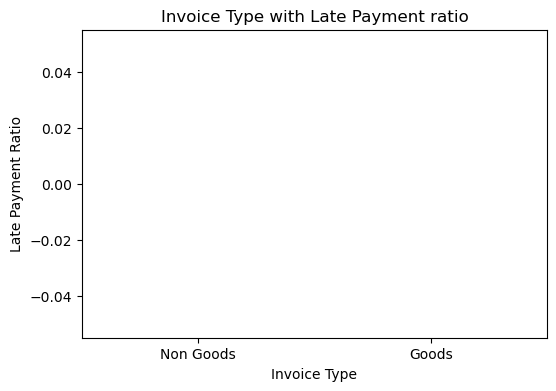

In [91]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=rec_pay_data, x='INVOICE_TYPE', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

###### Late payment ratio for Goods is higher than Non-Goods.

#### Step 3: Feature Engineering

##### PAYMENT_TERM column

In [95]:
# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [96]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

##### As it can be seen, around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets.

In [98]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

rec_pay_data['PAYMENT_TERM'].value_counts() # Sanity Check

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

#### Dummy Variable

In [100]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(rec_pay_data['PAYMENT_TERM']).drop('others', axis=1)

rec_pay_data = rec_pay_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
rec_pay_data.shape # Sanity Check

(92811, 26)

In [101]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(rec_pay_data['INVOICE_CLASS'])
class_dummies
rec_pay_data = rec_pay_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [102]:
rec_pay_data.shape

(92811, 28)

In [103]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

#### Open Invoice Data

#### Reading and understanding the data

In [106]:
# Reading the open invoice dataset
open_data = pd.read_csv("C:\\Users\\SHRADDHA\\Downloads\\Open_Invoice_data (3).csv", encoding='latin1')
open_data.head()    

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [107]:
open_data.shape

(88204, 14)

In [108]:
# Removing unecessary columns (that are not there in the receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' as they bear no significance for our target var.
# Dropping 'Local amount'

open_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)


In [109]:
# Checking the shape of the data again
open_data.shape

(88204, 7)

In [110]:
print(open_data.columns)

# Dropping unnecessary columns, ignoring if some are missing
open_data.drop(['AS_OF_DATE', 'Customer Type', 'Transaction Date', 'Transaction Currency', 
                'Transaction Number', 'Customer Account No', 'Local Amount'], axis=1, errors='ignore', inplace=True)

# Verify the remaining columns
print(open_data.columns)


Index(['Customer_Name', 'Payment Term', 'Due Date', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')
Index(['Customer_Name', 'Payment Term', 'Due Date', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')


In [111]:
# Checking the head
open_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [112]:
# Checking the info of the data
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [113]:
# Checking for null values
round(open_data.isna().sum()/len(open_data.index), 4)


Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

##### No null values present in the dataset.

In [115]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
open_data['Due Date'] = pd.to_datetime(open_data['Due Date'])
open_data['INV_CREATION_DATE'] = pd.to_datetime(open_data['INV_CREATION_DATE'])


In [116]:
# Checking the different values present in USD Amount column
open_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [117]:
# Replace commas and convert to float, handling non-string values
open_data['USD Amount'] = open_data['USD Amount'].apply(
    lambda x: x.replace(",", "") if isinstance(x, str) else x
)

# Convert the cleaned values to float (or int, if applicable)
open_data['USD Amount'] = open_data['USD Amount'].astype(float)

In [118]:
# Checking the USD Amount column again
open_data['USD Amount']

0        -3088.0
1         2000.0
2         2000.0
3         2415.0
4         3800.0
          ...   
88199    -1199.0
88200     -914.0
88201    12866.0
88202    18118.0
88203    18499.0
Name: USD Amount, Length: 88204, dtype: float64

#### There are negative values present in the column, hence it is safe to remove negative and 0 values.

In [120]:
# Keeping the values above 0 for USD Amount column
open_data = open_data[open_data['USD Amount']>0]

In [121]:
# Checking the info of the data set
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  float64       
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 4.9+ MB


#### All the columns are in correct format now.

### Feature Engineering

#### Payment Term column

In [125]:
# Keeping the same levels as done in recieved payment dataset
open_data['Payment Term'] = open_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

open_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [126]:
print(open_data.columns)

import pandas as pd

# Check if 'Payment Term' exists in the DataFrame
if 'Payment Term' in open_data.columns:
    # Create dummy variables for the 'Payment Term' column
    term_dummies_open = pd.get_dummies(open_data['Payment Term'], drop_first=True)  # Use drop_first to avoid multicollinearity
    
    # Check if 'others' exists in the dummy variables and drop it
    if 'others' in term_dummies_open.columns:
        term_dummies_open = term_dummies_open.drop('others', axis=1)

    # Merging the dummies dataframe into open_data and removing the 'Payment Term' column
    open_data = open_data.join(term_dummies_open).drop('Payment Term', axis=1)

else:
    print("Column 'Payment Term' does not exist in open_data.")

# Display the first few rows of the updated DataFrame
print(open_data.head())

Index(['Customer_Name', 'Payment Term', 'Due Date', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')
  Customer_Name   Due Date Transaction Class  AGE  USD Amount  \
1     AL J Corp 2022-03-03           INVOICE   33      2000.0   
2     AL J Corp 2022-04-23           INVOICE  -18      2000.0   
3     AL R Corp 2022-01-19           INVOICE   76      2415.0   
4     ALLI Corp 2022-04-30           INVOICE  -25      3800.0   
5     ALLI Corp 2022-04-30           INVOICE  -25      1264.0   

    INV_CREATION_DATE  30 Days from EOM  30 Days from Inv Date  \
1 2022-02-01 14:09:00             False                   True   
2 2022-03-24 17:46:00             False                   True   
3 2022-01-05 11:49:00             False                  False   
4 2022-03-03 22:30:00              True                  False   
5 2022-03-03 22:30:00              True                  False   

   45 Days from EOM  45 Days from Inv Date  60 Days from EOM  \
1  

#### Transaction Class column

In [128]:
# Check the existing columns
print(open_data.columns)

# Use get() to check if the column exists before trying to get value counts
transaction_class_counts = open_data.get('Transaction Class')
if transaction_class_counts is not None:
    print(transaction_class_counts.value_counts())
else:
    print("The 'Transaction Class' column does not exist.")

Index(['Customer_Name', 'Due Date', 'Transaction Class', 'AGE', 'USD Amount',
       'INV_CREATION_DATE', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment'],
      dtype='object')
Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64


In [129]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')



In [130]:
# Creating dummy variables for the column
tc = pd.get_dummies(open_data['Transaction Class'])

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_data['CM'] = 0

In [131]:
# Checking the head of the data
open_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000.0,2022-02-01 14:09:00,False,True,False,False,False,False,False,False,False,False,True,0
2,AL J Corp,2022-04-23,-18,2000.0,2022-03-24 17:46:00,False,True,False,False,False,False,False,False,False,False,True,0
3,AL R Corp,2022-01-19,76,2415.0,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,True,0
4,ALLI Corp,2022-04-30,-25,3800.0,2022-03-03 22:30:00,True,False,False,False,False,False,False,False,False,False,True,0
5,ALLI Corp,2022-04-30,-25,1264.0,2022-03-03 22:30:00,True,False,False,False,False,False,False,False,False,False,True,0


#### Checking columns in received payment dataset and open invoice dataset

In [133]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [134]:
open_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       '45 Days from Inv Date', '60 Days from EOM', '60 Days from Inv Date',
       '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 'DM',
       'INV', 'CM'],
      dtype='object')

##### Customer Segmentation

##### Recommendation: Customer-level attributes could also be important independent variables to be included in the model. 
#### A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: 
#### the average payment time in days for a customer and the standard deviation for the payment time. 
#### Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model.

In [137]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
rec_pay_data['act_days_for_pay'] = (rec_pay_data['RECEIPT_DATE']-rec_pay_data['INVOICE_CREATION_DATE']).dt.days


In [138]:
# Calculating customer wise average days for payment
cust_seg1= rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()


,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [139]:
# Calculating the standard deviation for customer wise payment days
cust_seg2 = rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [140]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


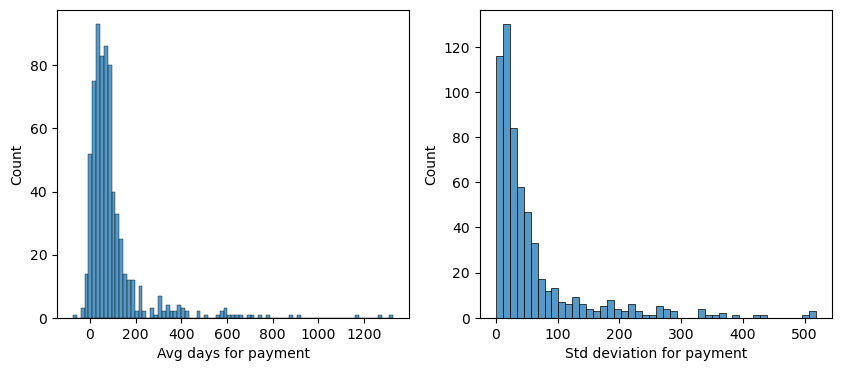

In [141]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

##### From the above plots we can see that the data is not normalized, hence need to do scaling.

In [143]:
#importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])


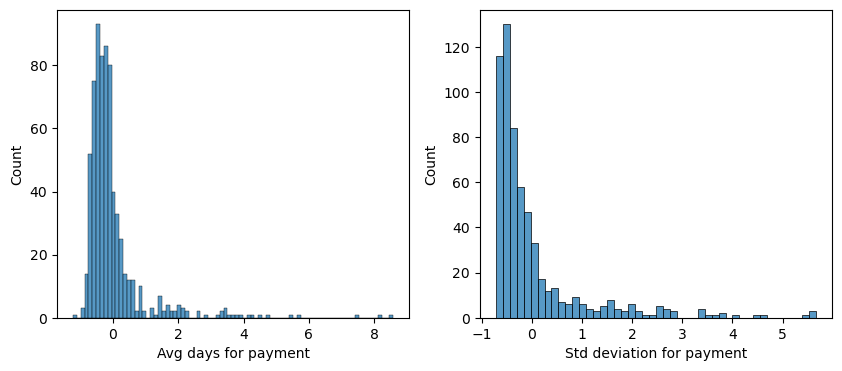

In [144]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [145]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [146]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [147]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [148]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


#### Clustering

In [150]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [151]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[ 1.85344423,  3.33339499],
       [-0.3019069 , -0.32884213],
       [ 4.66736808,  0.44512922],
       [ 0.42465258,  0.94746544]])

### Finding optimal number of clusters

In [153]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.7491797445652462
For n_clusters=4, the silhouette score is 0.6097388985555463
For n_clusters=5, the silhouette score is 0.6173540681032771
For n_clusters=6, the silhouette score is 0.3980238443004184
For n_clusters=7, the silhouette score is 0.4012628375918799
For n_clusters=8, the silhouette score is 0.41457849738976615


### From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [155]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [156]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [157]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1
2,A3 D Corp,-0.387513,-0.075683,1
3,ABC Corp,-0.593276,-0.724119,1
4,ABDU Corp,-0.167009,-0.046851,1


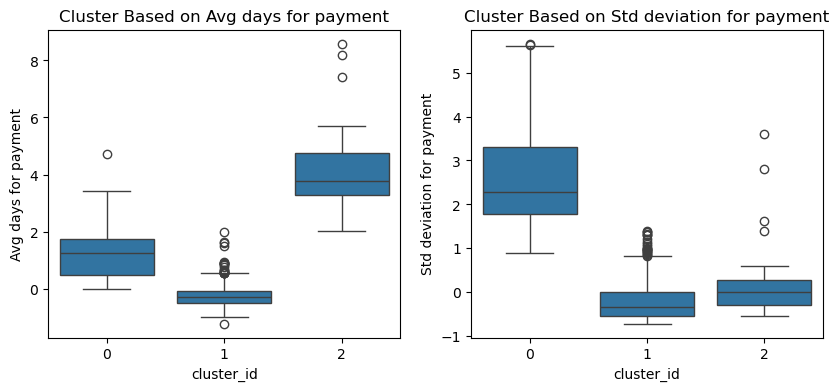

In [158]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

##### '1' Cluster -- Prolonged Invoice Payment

##### '2' Cluster -- Early Invoice Payment

##### '0' Cluster -- Medium Invoice Payment

In [160]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers


In [161]:
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [162]:
# Creating a copy
cust_dict = cust_seg.copy()

In [163]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [164]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

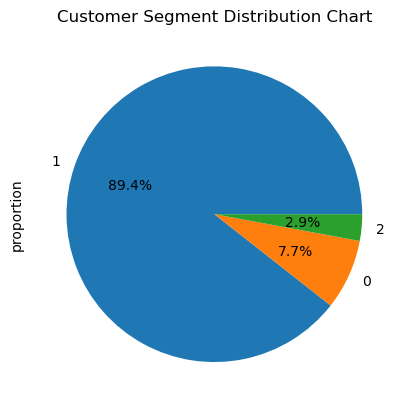

In [165]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

###### '1' Cluster -- Prolonged Invoice Payment

###### '2' Cluster -- Early Invoice Payment

###### '0' Cluster -- Medium Invoice Payment

###### ---From the above we can see that Early customers comprise of 88.7% of customers whereas medium and prolonged payers are 11.3% in total

In [168]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,False,False,False,False,False,False,False,True,169,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,False,False,False,False,False,False,False,True,33,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,False,False,False,False,False,False,False,True,1,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,1


In [169]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

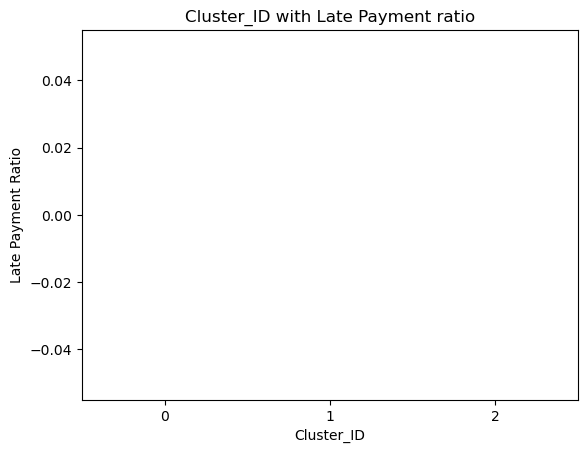

In [170]:
sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [171]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

##### Step 4: Data Preparation for Model building

In [173]:
# Creating a new dataframe with important variables for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.63040,2020-11-02,False,True,False,False,False,False,False,False,False,False,False,True,False,1
1,48990.21133,2020-12-29,False,False,True,False,False,False,False,False,False,False,False,True,False,1
2,41991.60971,2021-01-30,False,False,True,False,False,False,False,False,False,False,False,True,False,1
3,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,0
4,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,1


In [174]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,False,True,False,False,False,False,False,False,False,False,False,True,False,1,11
1,48990.21133,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12
2,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,1
3,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,0,12
4,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12


In [175]:
reg_df.shape

(92811, 16)

In [176]:
# Open Invoice dataset
open_reg_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_reg_df.head()

KeyError: "['15 Days from EOM'] not in index"

In [ ]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_reg_df.head()

In [ ]:
# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date',axis=1,inplace= True)
open_reg_df.head()


In [ ]:
# Checking columns for both datasets
reg_df.columns

In [ ]:
open_reg_df.columns

#### Train- Test Split

In [ ]:
# Feature variables X
X = reg_df.copy()
X.head()

In [ ]:
# Target variable y
y = merged_df['default']
y.head()

In [ ]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

#### Feature Scaling

In [ ]:
X_train.shape

In [ ]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

In [ ]:
X_train.describe()

In [ ]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

##### CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, hence dropping these columns.

In [ ]:
# Check the existing columns in X_train and X_test
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Safely drop the specified columns
X_train.drop(['CM', 'INV', 'DM'], axis=1, errors='ignore', inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, errors='ignore', inplace=True)

# Verify the remaining columns after dropping
print("Remaining X_train columns:", X_train.columns)
print("Remaining X_test columns:", X_test.columns)

In [ ]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

#### Now the data has no high multicollinearity. Going ahead with model building

####  Model Building

##### Logistic Regression

In [ ]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

#### 1st Model

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample code to check and clean your DataFrame
# Assuming X_train is already defined

# Step 1: Check for missing values and non-numeric columns
print("Initial DataFrame:")
print(X_train.head())

# Check for missing values
print("Missing values per column:")
print(X_train.isnull().sum())

# Check data types
print("Data types of each column:")
print(X_train.dtypes)

# Step 2: Convert all columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check for columns with NaN after conversion
print("DataFrame after conversion to numeric:")
print(X_train.head())

# Step 3: Handle NaN values (drop or fill)
X_train = X_train.dropna()  # or use X_train.fillna(value) for imputation

# Step 4: Check for any remaining object types (should not exist)
if X_train.select_dtypes(include=['object']).shape[0] > 0:
    print("There are still object-type columns that need to be converted.")
else:
    print("All columns are now numeric.")

# Step 5: Add constant and fit the model
X_train_sm = sm.add_constant(X_train)
# Assuming y_train is defined and is a valid Series
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Step 6: Check the summary of the model
print(res.summary())

##### Checking VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check for any columns that may still have non-numeric types
print("Data types after conversion:")
print(X_train.dtypes)

# Step 2: Check for infinite values and replace them with NaN (if any)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Handle missing values (drop or impute)
X_train = X_train.fillna(0)  # You can use dropna() or any other imputation strategy

# Verify the DataFrame before calculating VIF
print("DataFrame after cleaning:")
print(X_train.head())

# Step 4: Calculate VIF
if X_train.shape[1] > 0:  # Ensure there are columns to calculate VIF
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    # Step 5: Round the VIF values and sort
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)

    # Step 6: Display the VIF values
    print(vif)
else:
    print("No numeric features available to calculate VIF.")

##### Both the p-value and VIF are in acceptable range, hence going ahead with this model.

In [ ]:
# Assuming 'res' is your fitted model and 'X_train_sm' includes the constant term
y_train_pred = res.predict(X_train_sm)

# Display the first 10 predicted values
print("First 10 predicted values:")
print(y_train_pred[:10])

In [ ]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

#### Creating a new column 'final_pred' if 'default_pred' > 0.5

In [ ]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [ ]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)
confusion

In [ ]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))


#### We have 78.3% accuracy for our train data set.

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

In [ ]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

In [ ]:
# Calculate false postive rate
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

#### Finding the optimal cutoff point

In [ ]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.


In [ ]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

In [ ]:
# Let's check the overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

In [ ]:
# Precision Score
precision_score(y_pred.default, y_pred.final_predicted)


In [ ]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

In [ ]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)


In [ ]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

#### Plotting the ROC curve


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

In [ ]:
draw_roc(y_pred.default,y_pred.default_pred)

#### AUC = 0.83 which shows the model is good.

##### Making predictions on the test set

In [ ]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

In [ ]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [ ]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
y_test_df.head()

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)    

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)


In [ ]:
#precision score
precision_score(y_pred_final.default, y_pred_final.final_predicted)

In [ ]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

#### Our train and test accuracy is almost same around 77.5 %

#### Random Forest

In [ ]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
reg_df.columns

In [ ]:
Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [ ]:
# creating X and y
X= reg_df
y= merged_df['default']

In [ ]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

In [ ]:
RandomForestClassifier(random_state=42)

In [ ]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [ ]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

#### Accuracy is :  0.957563070481937

In [ ]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

##### Mean score: 0.9548965957922156
##### Standard deviation: 0.003277954728122406

In [ ]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [ ]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

###### Accuracy is :  0.9234305415888522

##### Hyperparameter Tuning

In [ ]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))


In [ ]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

##### From the above classification report, it can be seen that the f1-score for train and test set is 0.97 and 0.96, 
##### which implies that this is a good model. Hence moving forward with this as final model for prediction.

#### Checking feature importance

In [ ]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

##### Preparing Open Invoice dataset for prediction

##### The open invoice data has a column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. 
##### A positive value in the AGE column clearly indicates that the payment is already overdue. So, 
##### there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed.
##### Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [ ]:
# Selecting rows with negative age value for prediction
open_reg_df_age = open_data[open_data['AGE'] < 0]
open_reg_df_age.head()

In [ ]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [ ]:
# Null counts
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 4)


##### cluster_id has 2.7 % null value counts, hence removing the null values for better model predicti
##### as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [ ]:
# Dropping the rows containing null values
open_reg_df_age.dropna(axis=0, inplace=True)

In [ ]:
open_reg_df_age.shape

In [ ]:
open_reg_df_age.head()

In [ ]:
open_reg_df_age.info()

In [ ]:
# converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [ ]:
# Checking the head after adding 'cluster_id' column
open_reg_df_age.head()

In [ ]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [ ]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [ ]:
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [ ]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [ ]:
# Checking the columns in the dataset
open_reg_df_final.columns

##### Final Prediction based on Random Forest model

In [ ]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

In [ ]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

In [ ]:
# Customer-wise model prediction
customer_seg_prob= pd.DataFrame(open_reg_df_age.groupby('Customer_Name').prod()['Pred_rf'].round(4))
customer_seg_prob

In [ ]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)


In [ ]:
# Let us check our final dataframe with predictions
open_reg_df_age.head()

In [ ]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

In [ ]:
Text(0.5, 1.0, 'Late payment distributions')

##### From the above pie chart, we can observe that 50.2% payments in the open invoice data with AGE value negative(indicating due date not crossed)

##### Summary of prediction on Customers_name

In [ ]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [ ]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [ ]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [ ]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [ ]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [ ]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

In [ ]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 1 has significantly higher ratio of default than clusters 0 and 2

In [ ]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates

### Recommendations based on the derived insights:

###### --From our clustering analysis we can make the following inference
###### --Credit Note Payments observe the greatest delay rate compared to Debit Note or Invoice type invoice classes, 
###### hence company policies on payment collection could be made stricter around such invoice classes
###### --Goods type invoices had significantly greater payment delay rates than non-goods types and hence can be
###### subjected to stricter payment policies
###### --Since lower value payments comprise of the majority of the transactions, also late payments are seen more on
###### lower value payments, it is recommended to focus more on those. The company can apply penalties depending on
###### billing amount, the lesser the bill, the greater the percentage of penalty on late payments. Ofcourse this has to be last resort
###### -- customer segments were clustered into three categories, viz., 0,1 and 2 which mean medium, prolonged and early 
###### payment duration respectively. It was found that customers in cluster 1 (prolonged days) had significantly greater delay rates than early 
###### and medium days of payment, hence cluster 1 customers should be paid extensive focus
###### --The above companies with the greatest probability and total & delayed payment counts should be first priority and should be focused on more due to 
###### such high probability rates